<h1>E01 Grundlegende elektrische Schaltungen</h1>

Simon Legtenborg, Leonie Parsiegel

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.rcParams.update({'font.size': 15})
plt.rcParams["figure.figsize"] = (10,8)

<h2>Aufgaben</h2>

<ol>
    <li>Bauen Sie eine Reihenschaltung bestehend aus drei Widerstanden mit
        unterschiedlichen Widerstandswerten auf. Legen Sie eine Spannung geeigneter Große
        an. Messen Sie Spannungen und Strome. Vergleichen Sie mit Ihren Vorhersagen.
        Wiederholen Sie die Messungen an
        einer Parallelschaltung bestehend aus drei Widerstanden. </li>
    <li>Bauen Sie einen Spannungsteiler auf und messen Sie die Spannung über den zweiten
        Widerstand für unterschiedliche Lastwiderstände. Stellen Sie die Daten graphisch
        dar und vergleichen Sie mit Ihren Vorhersagen</li>
    <li>Bauen Sie eine Wheatstone-Brucke auf. Legen Sie eine Spannung geeigneter Größe
        an. Messen Sie die Bruckenspannung als Funktion des Widerstandswerts eines
        variablen Widerstands in einem Bruckenarm. Stellen Sie die Daten graphisch dar und
        vergleichen Sie mit Ihren Vorhersagen. </li>
    <li>Bauen Sie einen Hoch- oder Tiefpass auf. Messen Sie mit einem Oszilloskop die
        Transferfunktion
        als Funktion der Frequenz. Stellen Sie die Daten graphisch dar und vergleichen Sie
        mit Ihren Vorhersagen.</li>

<h2>Aufgabe 1</h2>

<h3>Reihenschaltung</h3>

<h4>Messdaten</h4>

<table style="display: inline-block">
    <caption style="caption-side: bottom">Versuch 1.1 - Reihenschaltung</caption>
    <tr>
        <th>Größe</th>
        <th>Messwert</th>
        <th>Unsicherheit</th>
    </tr>
    <tr>
        <td>U1</td>
        <td>0.23V</td>
        <td>0.01</td>
    </tr>
    <tr>
        <td>U2</td>
        <td>0.046V</td>
        <td>0.001</td>
    <tr>
    <tr>
        <td>U3</td>
        <td>4.57V</td>
        <td>0.02</td>
    <tr>
    <tr>
        <td>Uges</td>
        <td>4.8V</td>
        <td>0.1</td>
    <tr>
    <tr>
        <td>I1</td>
        <td>0.229mA</td>
        <td>0.002</td>
    <tr>
    <tr>
        <td>I2</td>
        <td>0.229mA</td>
        <td>0.002</td>
    <tr>
    <tr>
        <td>R1</td>
        <td>1000 Ohm</td>
        <td>5</td>
    <tr>
    <tr>
        <td>R2</td>
        <td>200 Ohm</td>
        <td>1</td>
    <tr>
    <tr>
        <td>R3</td>
        <td>2000 Ohm</td>
        <td>10</td>
    <tr>
</table>

<table style="display: inline-block">
    <caption style="caption-side: bottom">Versuch 1.2 - Parallelschaltung</caption>
    <tr>
        <th>Größe</th>
        <th>Messwert</th>
        <th>Unsicherheit</th>
    </tr>
    <tr>
        <td>Uges</td>
        <td>4.8V</td>
        <td>0.1</td>
    <tr>
    <tr>
        <td>I1</td>
        <td>4.63mA</td>
        <td>0.02</td>
    <tr>
    <tr>
        <td>I2</td>
        <td>21.4mA</td>
        <td>0.1</td>
    <tr>
    <tr>
        <td>I3</td>
        <td>0.23mA</td>
        <td>0.002</td>
    <tr>
    <tr>
        <td>R1</td>
        <td>1000 Ohm</td>
        <td>5</td>
    <tr>
    <tr>
        <td>R2</td>
        <td>200 Ohm</td>
        <td>1</td>
    <tr>
    <tr>
        <td>R3</td>
        <td>2000 Ohm</td>
        <td>10</td>
    <tr>
</table>

<h4>Vorhersagen - Reihenschaltung</h4>

In [19]:
U = 4.8
R1 = 1000
R2 = 200
R3 =20000

dU = 0.1
dR1 =5
dR2 =1
dR3 =10

In [20]:
I = U/(R1+R2+R3)
U1 = R1 * U/(R1+R2+R3)
U2 = R2 * U/(R1+R2+R3)
U3 = R3 * U/(R1+R2+R3)

dI = np.sqrt((dU/(R1+R2+R3))**2+(U/(R1+R2+R3)**2)**2*(dR1**2+dR2**2+dR3**2))
dU1 = np.sqrt((R1*dU/(R1+R2+R3))**2+(U*(R2+R3)*dR1/(R1+R2+R3)**2)**2+(R1*U*dR2/(R1+R2+R3)**2)**2+(R1*U*dR3/(R1+R2+R3)**2)**2)
dU2 = np.sqrt((R2*dU/(R1+R2+R3))**2+(U*(R1+R3)*dR2/(R1+R2+R3)**2)**2+(R2*U*dR1/(R1+R2+R3)**2)**2+(R2*U*dR3/(R1+R2+R3)**2)**2)
dU3 = np.sqrt((R3*dU/(R1+R2+R3))**2+(U*(R1+R2)*dR3/(R1+R2+R3)**2)**2+(R3*U*dR2/(R1+R2+R3)**2)**2+(R3*U*dR1/(R1+R2+R3)**2)**2)
print(f"Der Strom I=I1=I2=I3 beträgt {round(I,6)}+-{round(dI,6)} A ")
print(f"Die Spannung U1 beträgt {round(U1,4)}+-{round(dU1,4)} V")
print(f"Die Spannung U2 beträgt {round(U2,4)}+-{round(dU2,4)} V")
print(f"Die Spannung U3 beträgt {round(U3,4)}+-{round(dU3,4)} V")

Der Strom I=I1=I2=I3 beträgt 0.000226+-5e-06 A 
Die Spannung U1 beträgt 0.2264+-0.0048 V
Die Spannung U2 beträgt 0.0453+-0.001 V
Die Spannung U3 beträgt 4.5283+-0.0943 V


<h4>Vorhersagen - Parallelschaltung</h4>

In [21]:
Uges = 4.8
R1 = 1000
R2 = 200
R3 =20000

dU = 0.1
dR1 =5
dR2 =1
dR3 =10

In [22]:
Iges = Uges*(1/R1+1/R2+1/R3)
I1 = Uges/R1
I2 = Uges/R2
I3 = Uges/R3

dI=np.sqrt((dU*(1/R1+1/R2+1/R3))**2+((Uges*dR1)/R1**2)**2+((Uges*dR2)/R2**2)**2+((Uges*dR3)/R3**2)**2)
dI1=np.sqrt((dU/R1)**2+(Uges*dR1/R1**2)**2)
dI2=np.sqrt((dU/R2)**2+(Uges*dR2/R2**2)**2)
dI3=np.sqrt((dU/R3)**2+(Uges*dR3/R3**2)**2)

print(f"Der Gesamtstrom Iges beträgt {round(Iges,4)}+-{round(dI,4)}")
print(f"Der Strom I1 beträgt {round(I1,4)}+-{round(dI1,4)}A")
print(f"Der Strom I2 beträgt {round(I2,4)}+-{round(dI2,4)}A")
print(f"Der Strom I3 beträgt {round(I3,5)}+-{round(dI3,5)}A")

Der Gesamtstrom Iges beträgt 0.029+-0.0006
Der Strom I1 beträgt 0.0048+-0.0001A
Der Strom I2 beträgt 0.024+-0.0005A
Der Strom I3 beträgt 0.00024+-1e-05A


<h4> Auswertung Reihenschaltung</h4>

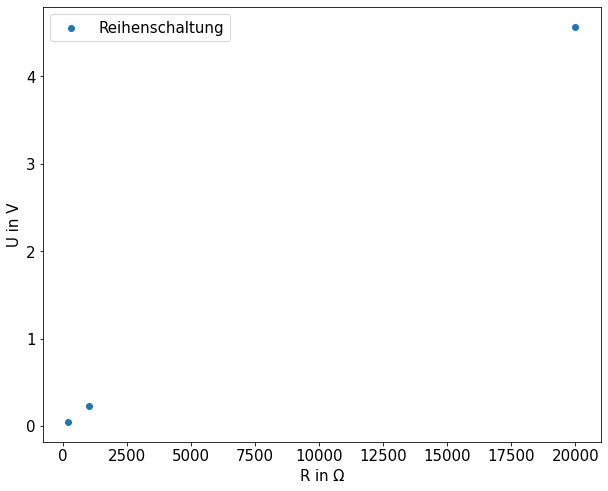

In [23]:
U=[0.23,0.046,4.57]
R=[1000,200,20000]

plt.scatter(R,U, label="Reihenschaltung")
plt.xlabel("R in $\Omega$")
plt.ylabel("U in V")
plt.legend()
plt.show()

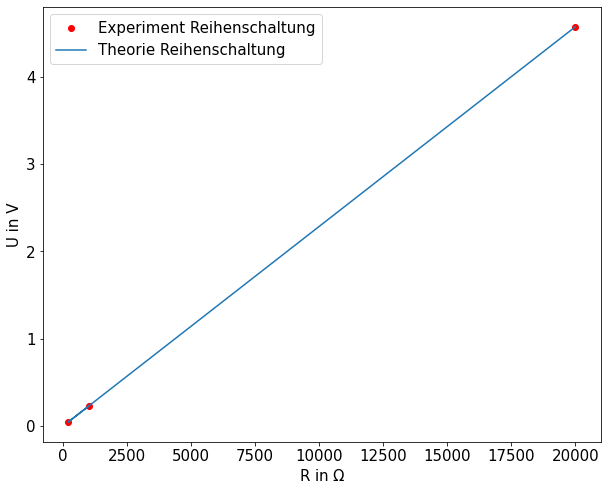

I = 0.00023A


In [24]:
def theory(R, I):
    return R*I

I, cov = curve_fit(theory, R, U)

plt.scatter(R,U, label="Experiment Reihenschaltung", color="red")
plt.plot(R, theory(R, I), label="Theorie Reihenschaltung")
plt.xlabel("R in $\Omega$")
plt.ylabel("U in V")
plt.legend()
plt.show()
print(f"I = {round(I[0],5)}A")

<h4>Auswertung Parallelschaltung</h4>

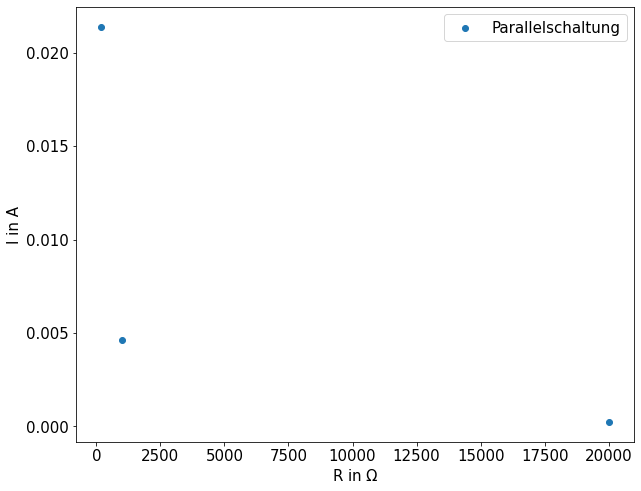

In [25]:
I=np.array([4.63,21.4,0.23])*10**-3
R=np.array([1000,200,20000])

plt.scatter(R,I, label="Parallelschaltung")
plt.xlabel("R in $\Omega$")
plt.ylabel("I in A")
plt.legend()
plt.show()

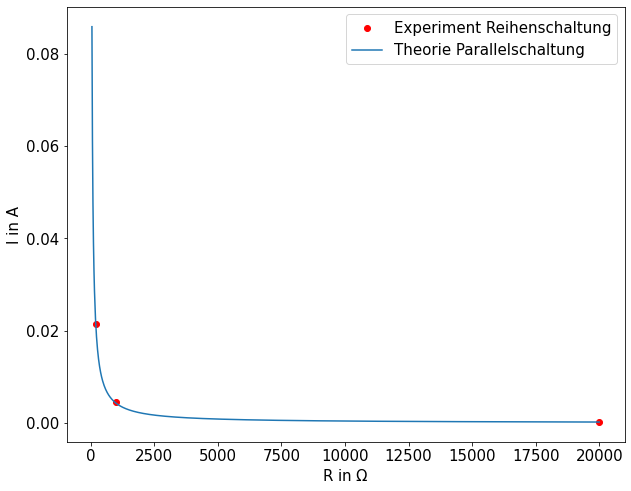

U = 4.29349V


In [26]:
def theory(R, U):
    return U/R

U, cov = curve_fit(theory, R, I, p0=4)

plt.scatter(R,I, label="Experiment Reihenschaltung", color="red")
plt.plot(np.linspace(50,20000,1000), theory(np.linspace(50,20000,1000), U), label="Theorie Parallelschaltung")
plt.xlabel("R in $\Omega$")
plt.ylabel("I in A")
plt.legend()
plt.show()
print(f"U = {round(U[0],5)}V")

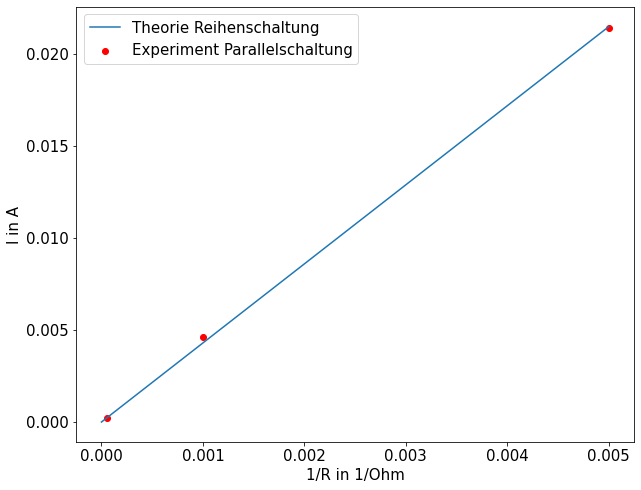

Spannung: 4.293491010585269 Volt


In [27]:
def theory(R,U):
    return U*R

U, cov = curve_fit(theory, 1/R, I)

plt.plot(np.linspace(0,0.005,1000), U * np.linspace(0,0.005,1000), label="Theorie Reihenschaltung" )
plt.scatter(1/R, I, label="Experiment Parallelschaltung", color="red")
plt.xlabel("1/R in 1/Ohm")
plt.ylabel("I in A")

plt.legend()
plt.show()
print(f"Spannung: {U[0]} Volt")

<h2>Aufgabe 2</h2>

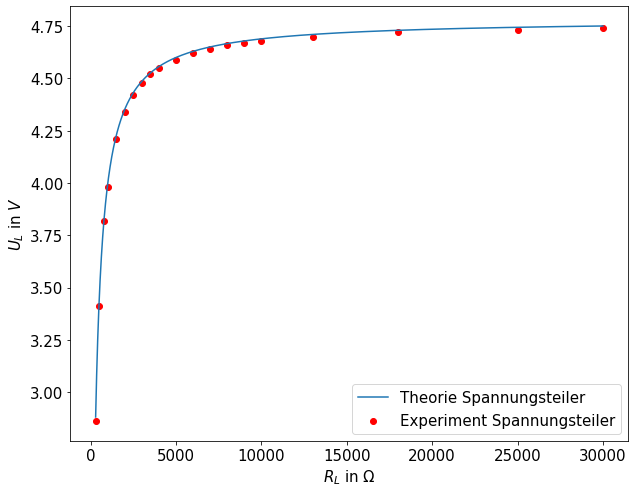

In [28]:
U = 4.83
R1 = 200
R2 = 20000

RL = np.array([300,500,800,1000,1500,2000,2500,3000,3500,4000,5000,6000,7000,8000,9000,10000,13000,18000,25000,30000])
UL = np.array([2.86,3.41,3.82,3.98,4.21,4.34,4.42,4.48,4.52,4.55,4.59,4.62,4.64,4.66,4.67,4.68,4.7,4.72,4.73,4.74])

RLT = np.linspace(300,30000,10000)
ULT = U * (R2*RLT/(R2+RLT))/(R1+(R2*RLT/(R2+RLT)))


plt.plot(RLT, ULT, label="Theorie Spannungsteiler")
plt.scatter(RL, UL, label="Experiment Spannungsteiler", color="red")
plt.xlabel(f"$R_L$ in $\Omega$")
plt.ylabel(f"$U_L$ in $V$")
plt.legend()
plt.show()

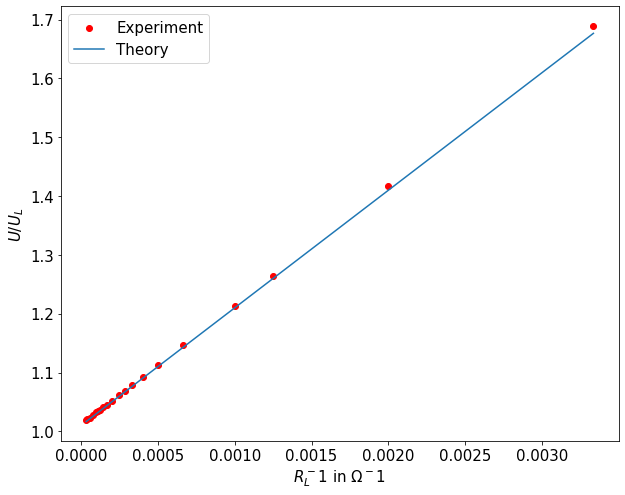

In [29]:
x = 1/RL
y = U/UL
plt.scatter(1/RL,U/UL, color="red", label="Experiment")
plt.plot(1/RLT,U/ULT, label="Theory")
plt.xlabel(f"$R_L^{-1}$ in $\Omega^{-1}$")
plt.ylabel(f"$U/U_L$")
plt.legend()
plt.show()

In [30]:
def theory(x,m,n):
    return m*x+n
m, cov = curve_fit(theory,x,y)
print(f"Die Steigung m: {m[0]} +- {np.sqrt(cov[0,0]/len(x))}")
print(f"Die Konsante n: {m[1]} +- {np.sqrt(cov[1,1]/len(x))}")

Die Steigung m: 202.83955654903244 +- 0.045152169752731626
Die Konsante n: 1.0115710818169221 +- 4.3917502082428543e-05


Also gilt für den Widerstand $R1 = m = 202.84$<br>
Für das Verhältnis $\frac{R1}{R2}$ gilt: $\frac{R1}{R2}=n-1=0.01$

<h2>Aufgabe 3</h2>

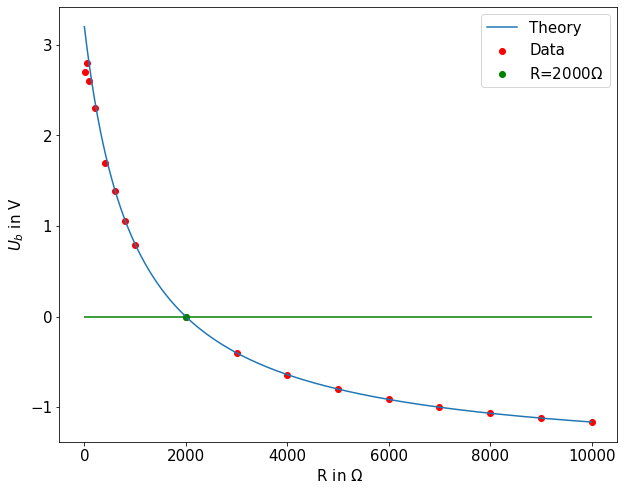

In [31]:
U = 4.8
R1 = 1000
R2 = 2000
R3 = 1000

Ub = np.array([2.7,2.8,2.6,2.3,1.7, 1.39, 1.06, 0.79,0,-0.4,-0.64,-0.8,-0.91,-1,-1.06,-1.12,-1.16])
R4 = np.array([20,50,100,200,400, 600, 800, 1000,2000,3000,4000,5000,6000,7000,8000,9000,10000])

R4T = np.linspace(0,10000,2000)
UbT=U*(R2/(R1+R2)-R4T/(R3+R4T))
plt.plot(R4T,UbT, label="Theory")
plt.scatter(R4,Ub, label = "Data", color="red")
plt.scatter(2000,0,color="green", label="R=2000$\Omega$")
plt.hlines(0,0,10000, color="green")
plt.xlabel(" R in $\Omega$")
plt.ylabel("$U_b$ in V")
plt.legend()
plt.show()

<h2>Aufgabe 4</h2>

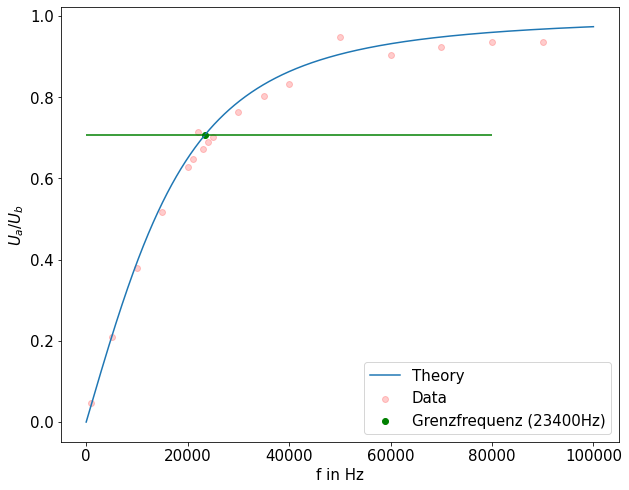

In [32]:
R = 1000
C = 6.8*10**-9

UE = np.array([0.054, 0.405,0.684, 0.864,0.98,0.999,1.09,1.026,1.035, 1.044, 1.09, 1.116, 1.134, 1.252,1.161, 1.152,1.143, 1.125])
UA= np.array([1.13, 1.92, 1.803, 1.669,1.561,1.543,1.524,1.525,1.498, 1.489, 1.426, 1.391, 1.364, 1.319,1.283, 1.247,1.22, 1.202])
f = np.array([1000, 5000,10000,15000,20000,21000,22000,23000,24000,25000, 30000, 35000,40000, 50000,60000,70000,80000,90000])



fT = np.linspace(10,100000,10000)
UtT=1/np.sqrt(1+1/(2*np.pi*fT*C*R)**2)
plt.plot(fT,UtT, label="Theory")
plt.scatter(f,UE/UA, label="Data", color="Red", alpha=0.2)
plt.hlines(1/np.sqrt(2),0,80000, color="Green")
plt.scatter(23400,np.sqrt(1/2), color ="green", alpha=1, label="Grenzfrequenz (23400Hz)")
plt.xlabel("f in Hz")
plt.ylabel(f"$U_a/U_b$")
plt.legend()
plt.show()

In [33]:
R = 1000
def theory(f,C):
    return 1/np.sqrt(1+1/(2*np.pi*f*C*R)**2)

C, cov = curve_fit(theory, f,UE/UA, p0=10**-9)
print(f"Kapazität {C[0]}F")

Kapazität 6.456019653989335e-09F


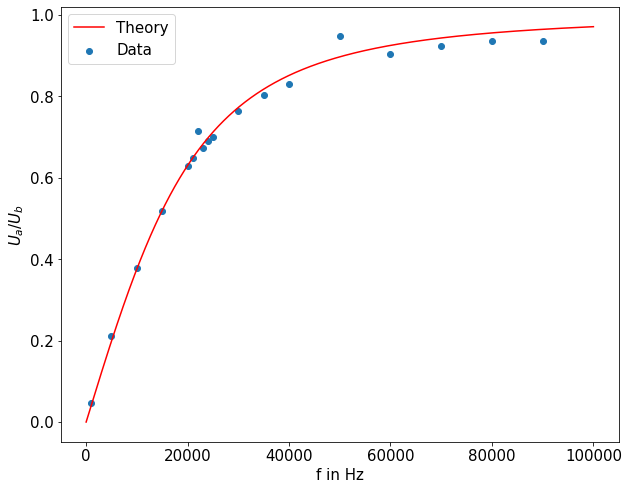

In [34]:
fT = np.linspace(10,100000,10000)
UtT=1/np.sqrt(1+1/(2*np.pi*fT*C*R)**2)
plt.plot(fT,UtT, label="Theory", color="Red")
plt.scatter(f,UE/UA, label="Data")
plt.xlabel("f in Hz")
plt.ylabel(f"$U_a/U_b$")
plt.legend()
plt.show()